In [5]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

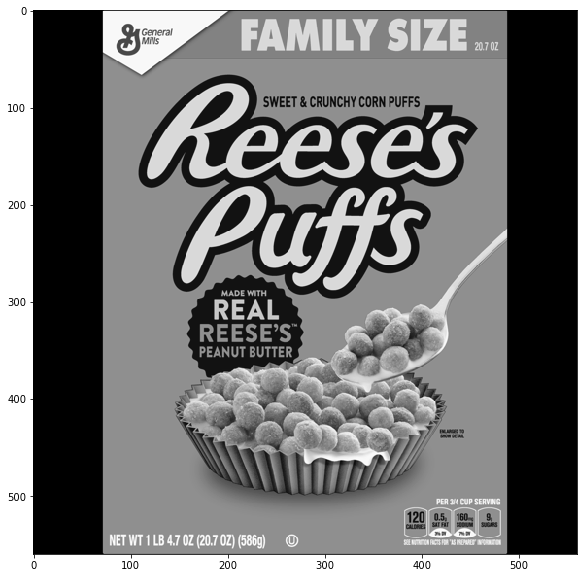

In [11]:
reeses = cv2.imread('Computer Vision With Python/DATA/reeses_puffs.png', 0)
display(reeses)

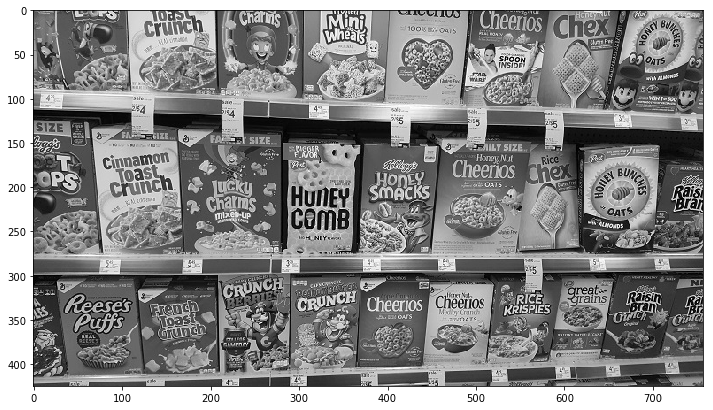

In [13]:
cereals = cv2.imread('Computer Vision With Python/DATA/many_cereals.jpg', 0)
display(cereals)

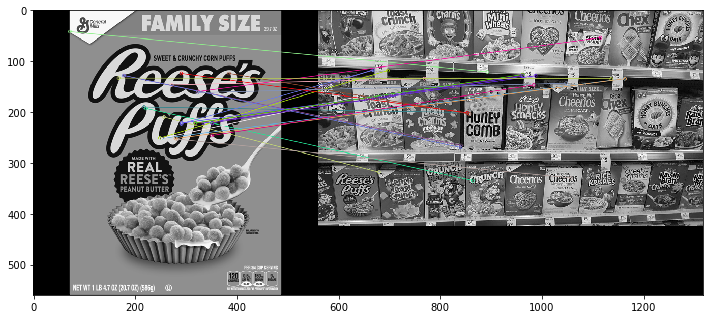

In [23]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)
display(reeses_matches)

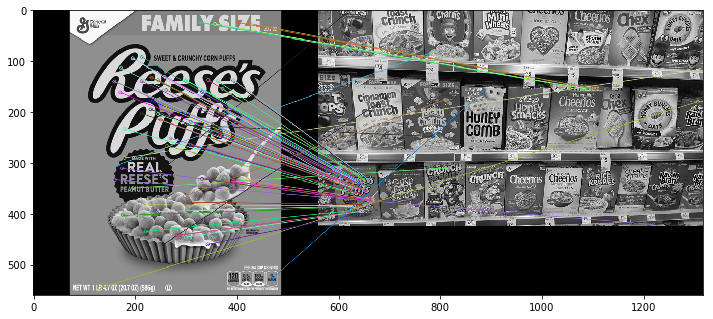

In [27]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
# less distance == beter match
for match1, match2 in matches:
    # if match 1 distance is less than 75% of match 2 distance 
    # then descriptor was a good match
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
        
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)